In [1]:
import numpy as np
import pandas as pd
import os
import time
import shutil
import pydicom as dicom
import sys
sys.path.append('../')
from src.utils import *

ModuleNotFoundError: No module named 'pydicom'

In [2]:
import torch

ImportError: libmagma.so: cannot open shared object file: No such file or directory

In [3]:
summary = pd.read_csv('summary.csv')
cohort = pd.read_csv('728 Cohort.csv')

In [4]:
summary.head()

,File Name,Folder,Participant ID,Study Date,Bar Code,Description,Image Size,KLG,Method,IsSuccessful,Month
0,9000296_96m_LEFT_KNEE.hdf5,/gpfs/data/denizlab/Datasets/OAI_original/96m/...,9000296,20120720,16604011302,LEFT,1024x1024,3.0,mix,1,96m
1,9000296_96m_RIGHT_KNEE.hdf5,/gpfs/data/denizlab/Datasets/OAI_original/96m/...,9000296,20120720,16604011302,RIGHT,1024x1024,2.0,mix,1,96m
2,9000798_96m_LEFT_KNEE.hdf5,/gpfs/data/denizlab/Datasets/OAI_original/96m/...,9000798,20120928,16603896401,LEFT,1024x1024,4.0,mix,1,96m
3,9000798_96m_RIGHT_KNEE.hdf5,/gpfs/data/denizlab/Datasets/OAI_original/96m/...,9000798,20120928,16603896401,RIGHT,1024x1024,1.0,mix,1,96m
4,9001897_96m_LEFT_KNEE.hdf5,/gpfs/data/denizlab/Datasets/OAI_original/96m/...,9001897,20130116,16603998101,LEFT,1024x1024,0.0,mix,1,96m


In [5]:
summary = summary.loc[summary.Month =='00m']
KLG = summary[['File Name','Participant ID','Study Date','Bar Code','Description','KLG','Folder']]

In [6]:
prob_id = ['9085790', '9087632', '9157384', '9223980',
           '9382992', '9512864', '9511862', '9556402', '9708759', '9874820',
           '9930342']

In [38]:
num_item = 11

In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
inst =summary.loc[summary['Participant ID'] == int(prob_id[num_item])]
p_id = inst['Participant ID'].values[0]
s_d = inst['Study Date'].values[0]
b_code = inst['Bar Code'].values[0]
image_path = '/gpfs/data/denizlab/Users/bz1030/test/test_image/'
img_file = '{}_{}_00{}.png'.format(p_id,s_d,b_code)
img = mpimg.imread(image_path + img_file)
plt.imshow(img)
plt.show()

IndexError: list index out of range

In [32]:
ori_path = inst.Folder.values[0]
img, data,img_before = image_preprocessing( ori_path + '/001')

Mean:  816.2977619171143


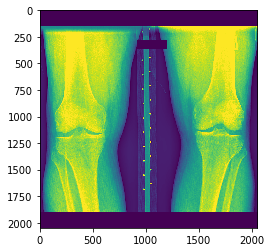

In [33]:
plt.imshow(img)

In [34]:
right_img = extract_knee(img,side = 1)
left_img = extract_knee(img,side = 0)

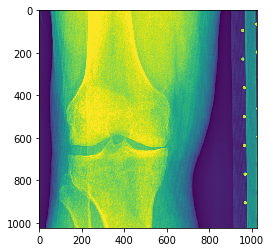

In [35]:
plt.imshow(right_img)

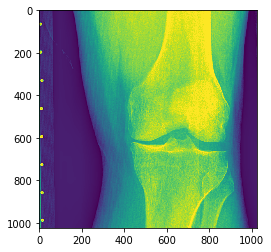

In [36]:
plt.imshow(left_img)

In [37]:
file_name = '{}_00m_LEFT_KNEE_fix.h5'.format(p_id)
f = h5py.File(file_name,'w')
f.create_dataset('data', data = left_img)
f.close()
file_name = '{}_00m_RIGHT_KNEE_fix.h5'.format(p_id)
f = h5py.File(file_name,'w')
f.create_dataset('data', data = right_img)
f.close()